In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

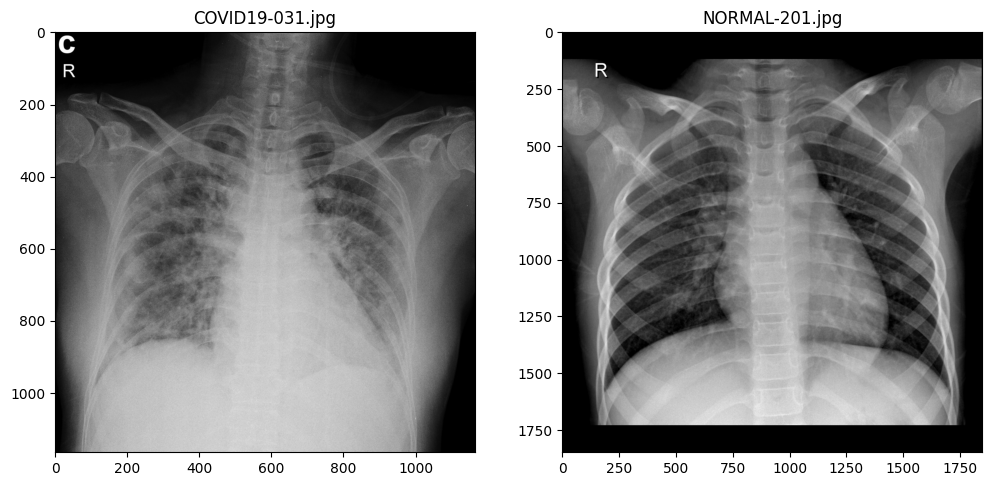

In [3]:
# Importar librerias os, shutil, glob, numpy, randrange
import shutil
import glob
from random import randrange
from tensorflow.keras.preprocessing import image

# Obtenemos la ruta del proyecto
ruta_proyecto = '/content/drive/MyDrive/MachineLearning/Covid_19'
data_train = '/content/drive/MyDrive/MachineLearning/Covid_19/covid19_dataset/train'
data_test = '/content/drive/MyDrive/MachineLearning/Covid_19/covid19_dataset/test'

# Para mostrar algunas imagenes las obtenemos de la carpeta
archivos_train = glob.glob(data_train + '/covid19/*.*')
archivos_test = glob.glob(data_test + '/normal/*.*')

# Cargando algunas imagenes de forma aleatoria desde 1 hasta el tamaño de la lista de imagenes (1600 o 400)
# Obtenemos un archivo aleatoriamente
archivo_train = archivos_train[randrange(len(archivos_train))]
imagen_train = image.load_img(archivo_train)
archivo_test = archivos_test[randrange(len(archivos_test))]
imagen_test = image.load_img(archivo_test)

# Graficando (Ploteando) imagenes de las carpetas: Hermana entrenamiento, Hermana prueba
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.subplot(2,2,1)
plt.imshow(imagen_train)
plt.title(archivo_train.split('/')[-1])

plt.subplot(2,2,2)
plt.imshow(imagen_test)
plt.title(archivo_test.split('/')[-1])

plt.show()


In [4]:
# Ruta base a tu dataset
dataset_path = '/content/drive/MyDrive/MachineLearning/Covid_19/covid19_dataset'

# Parámetros
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Preprocesamiento y aumento de datos para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10
)

# Solo normalización para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes desde carpetas
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 352 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [9]:
# Crear el modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(1, activation='sigmoid')  # Activación sigmoid para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.6071 - loss: 0.6709 - val_accuracy: 0.8750 - val_loss: 0.4048
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.7985 - loss: 0.4524 - val_accuracy: 0.9545 - val_loss: 0.2146
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9148 - loss: 0.2034 - val_accuracy: 0.9545 - val_loss: 0.2270
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.8349 - loss: 0.4138 - val_accuracy: 0.9432 - val_loss: 0.2026
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.8641 - loss: 0.2906 - val_accuracy: 0.9545 - val_loss: 0.1944
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.8967 - loss: 0.2310 - val_accuracy: 0.9432 - val_loss: 0.1924
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.9332 - loss: 0.1848 - val_accuracy: 0.9432 - val_loss: 0.1738
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9322 - loss: 0.1800 - val_accuracy: 0.9432 - val_loss:

In [10]:
# Guardando Arquitectura y Pesos en archivos difrentess:
import os
ruta = '/content/drive/MyDrive/MachineLearning/Covid_19/output'
version = 1
export_path = os.path.join(ruta, str(version))
print(f'export_path = {export_path}')
model.export(export_path)

# Crear el directorio si no existe
os.makedirs(ruta + '/' + str(version), exist_ok=True)

model.save(ruta + '/' + str(version) + '/modelo_covid19.keras')

# 3. Exportar el modelo .pb
# Exportando el modelo para ser utilizado por Tensorflow Serving:
export_path = os.path.join(ruta, str(version))
model.export(export_path)

# 1. Configuración del modelo (json file)


# 2. Pesos del modelo (h5 file)
model.save('modelo_covid19.h5')

# 3. Exportar el modelo


export_path = /content/drive/MyDrive/MachineLearning/Covid_19/output/1
Saved artifact at '/content/drive/MyDrive/MachineLearning/Covid_19/output/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138528399873744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399870096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399868368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399870864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399869712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399871632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399871056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399874704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138528399871824: TensorSpec(shape=(), dt